# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import joblib, pickle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("UAP Job Kamis (Genap).csv")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1001 non-null   int64 
 1   job_id               1001 non-null   int64 
 2   title                1001 non-null   object
 3   location             985 non-null    object
 4   department           317 non-null    object
 5   salary_range         171 non-null    object
 6   company_profile      840 non-null    object
 7   description          1001 non-null   object
 8   requirements         856 non-null    object
 9   benefits             596 non-null    object
 10  telecommuting        1001 non-null   int64 
 11  has_company_logo     1001 non-null   int64 
 12  has_questions        1001 non-null   int64 
 13  employment_type      859 non-null    object
 14  required_experience  633 non-null    object
 15  required_education   648 non-null    object
 16  indust

In [4]:
df.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df['fraudulent'].value_counts()

fraudulent
0    977
1     24
Name: count, dtype: int64

In [6]:
df.count()

Unnamed: 0             1001
job_id                 1001
title                  1001
location                985
department              317
salary_range            171
company_profile         840
description            1001
requirements            856
benefits                596
telecommuting          1001
has_company_logo       1001
has_questions          1001
employment_type         859
required_experience     633
required_education      648
industry                781
function                667
fraudulent             1001
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,501.000000,0.032967,0.822178,0.471528,0.023976
std,289.108111,289.108111,0.178640,0.382554,0.499438,0.153051
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,251.000000,0.000000,1.000000,0.000000,0.000000
50%,500.000000,501.000000,0.000000,1.000000,0.000000,0.000000
75%,750.000000,751.000000,0.000000,1.000000,1.000000,0.000000
max,1000.000000,1001.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(1001, 19)

In [9]:
df.columns.tolist()

['Unnamed: 0',
 'job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

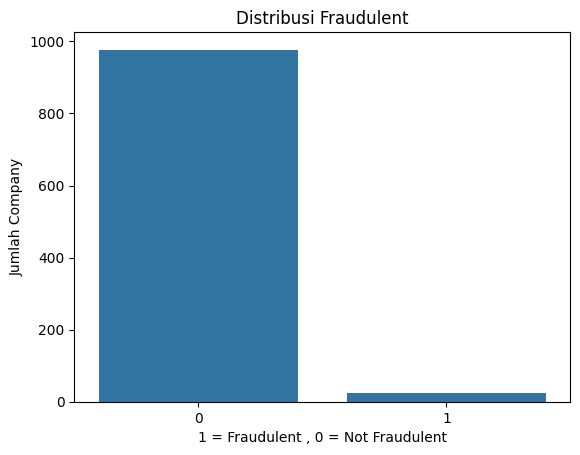

In [10]:
plt.Figure(figsize=(8,6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribusi Fraudulent')
plt.xlabel('1 = Fraudulent , 0 = Not Fraudulent')
plt.ylabel('Jumlah Company')
plt.show()

In [11]:
df.isnull().sum()

Unnamed: 0               0
job_id                   0
title                    0
location                16
department             684
salary_range           830
company_profile        161
description              0
requirements           145
benefits               405
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        142
required_experience    368
required_education     353
industry               220
function               334
fraudulent               0
dtype: int64

In [12]:
df_missing = df[df.isnull().any(axis=1)]
display(df_missing)

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,997,Financial Analyst / Intermediate Accountant,"CA, BC, Langley",Finance,40000-55000,Great Customer Service from Start to FinishWha...,"Centra Construction Group, a well established,...",The successful applicant will have the followi...,NaN,0,1,1,Full-time,Mid-Senior level,Certification,Construction,Finance,0
997,997,998,EXECUTIVE SOUS CHEF,"MY, ,",NaN,55000-65000,Le Meridien is situated in the heart of kuala ...,Responsible for assisting in the direction and...,NaN,NaN,0,1,0,Contract,Executive,NaN,Hospitality,NaN,1
998,998,999,Bookeeper/Supply Manager,"US, NY, Southampton",NaN,35000-45000,NaN,Full time Bookkeeper for local Southampton ene...,Heavy Quickbooks 2013 experience,MedicalPaid Time Off Policy,0,0,1,Full-time,Associate,NaN,Environmental Services,Accounting/Auditing,0
999,999,1000,Project Manager: Software and Web Development,"US, CA, San Diego",NaN,NaN,PINT is a leader in the web industry with 20 y...,PINT is seeking a detail-oriented and impassio...,Project/account management aptitude with the k...,"We offer industry-competitive salaries, health...",0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Project Management,0


In [13]:
df.duplicated().sum()

np.int64(0)

# Data Preprocessing

## Data Reduction

In [14]:
df.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [15]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('job_id', axis=1)
df = df.drop('salary_range', axis=1)
df = df.drop('company_profile', axis=1)
df = df.drop('description', axis=1)
df = df.drop('requirements', axis=1)
df = df.drop('benefits', axis=1)

In [16]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Drop Duplicated

## Handling Missing Value

In [17]:
df.isnull().sum()

title                    0
location                16
department             684
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        142
required_experience    368
required_education     353
industry               220
function               334
fraudulent               0
dtype: int64

In [18]:
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')

In [19]:
df['employment_type'] = df['employment_type'].fillna(df['employment_type'].mode()[0])
df['required_experience'] = df['required_experience'].fillna(df['required_experience'].mode()[0])
df['required_education'] = df['required_education'].fillna(df['required_education'].mode()[0])
df['industry'] = df['industry'].fillna(df['industry'].mode()[0])
df['function'] = df['function'].fillna(df['function'].mode()[0])

In [20]:
df.isnull().sum()

title                  0
location               0
department             0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Handling Categorical Value

In [21]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,Bachelor's Degree,Education Management,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Education Management,Customer Service,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [23]:
df['title'] = df['title'].apply(clean_text)
df['location'] = df['location'].apply(clean_text)
df['department'] = df['department'].apply(clean_text)
df['employment_type'] = df['employment_type'].apply(clean_text)
df['required_experience'] = df['required_experience'].apply(clean_text)
df['required_education'] = df['required_education'].apply(clean_text)
df['industry'] = df['industry'].apply(clean_text)
df['function'] = df['function'].apply(clean_text)

In [24]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,marketing intern,us ny new york,marketing,0,1,0,other,internship,bachelors degree,education management,marketing,0
1,customer service cloud video production,nz auckland,success,0,1,0,fulltime,not applicable,bachelors degree,marketing and advertising,customer service,0
2,commissioning machinery assistant cma,us ia wever,unknown,0,1,0,fulltime,midsenior level,bachelors degree,education management,customer service,0
3,account executive washington dc,us dc washington,sales,0,1,0,fulltime,midsenior level,bachelors degree,computer software,sales,0
4,bill review manager,us fl fort worth,unknown,0,1,1,fulltime,midsenior level,bachelors degree,hospital health care,health care provider,0


## Handling Numerical Columns

In [25]:
def clean_number(number):
    number = re.sub(r'[^0-9\s]', '', number)
    return number

In [26]:
df['telecommuting'] = pd.to_numeric(df['telecommuting'], errors='coerce')
df['has_company_logo'] = pd.to_numeric(df['has_company_logo'], errors='coerce')
df['has_questions'] = pd.to_numeric(df['has_questions'], errors='coerce')
df['fraudulent'] = pd.to_numeric(df['fraudulent'], errors='coerce')

# Data Transformation

In [27]:
df.head()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,marketing intern,us ny new york,marketing,0,1,0,other,internship,bachelors degree,education management,marketing,0
1,customer service cloud video production,nz auckland,success,0,1,0,fulltime,not applicable,bachelors degree,marketing and advertising,customer service,0
2,commissioning machinery assistant cma,us ia wever,unknown,0,1,0,fulltime,midsenior level,bachelors degree,education management,customer service,0
3,account executive washington dc,us dc washington,sales,0,1,0,fulltime,midsenior level,bachelors degree,computer software,sales,0
4,bill review manager,us fl fort worth,unknown,0,1,1,fulltime,midsenior level,bachelors degree,hospital health care,health care provider,0


In [28]:
le = LabelEncoder()
scaler = MinMaxScaler()

In [29]:
categorical_columns = ['title', 'department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

In [30]:
numerical_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

In [31]:
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [32]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [33]:
df = pd.get_dummies(df, columns=['location'], prefix='location')

In [34]:
df.head()

,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,...,location_us wi wausau,location_us wi western wisconsin,location_us wi windsor,location_us wv fairmont,location_us wv morgantown,location_us wy cheyenne,location_za,location_za ec east london,location_za nl richards bay,location_za wc cape town
0,426,78,0.0,1.0,0.0,2,4,1,20,21,...,False,False,False,False,False,False,False,False,False,False
1,140,129,0.0,1.0,0.0,1,6,1,48,7,...,False,False,False,False,False,False,False,False,False,False
2,115,136,0.0,1.0,0.0,1,5,1,20,7,...,False,False,False,False,False,False,False,False,False,False
3,11,115,0.0,1.0,0.0,1,5,1,13,29,...,False,False,False,False,False,False,False,False,False,False
4,75,136,0.0,1.0,1.0,1,5,1,32,16,...,False,False,False,False,False,False,False,False,False,False


# Build Model

## Data Splitting

In [35]:
df['fraudulent'] = df['fraudulent'].apply(lambda x: 1 if x == 1 else 0)
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Data Balancing

In [37]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Model Training

In [38]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [39]:
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

## Model Evaluation & Metrics

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.94


In [ ]:
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss : {loss:.2f}")

Log Loss : 0.49


In [ ]:
print("\nClassification Report : ")
print(classification_report(y_test, y_pred))


Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       196
           1       0.10      0.20      0.13         5

    accuracy                           0.94       201
   macro avg       0.54      0.58      0.55       201
weighted avg       0.96      0.94      0.95       201



## Confusion Matrix

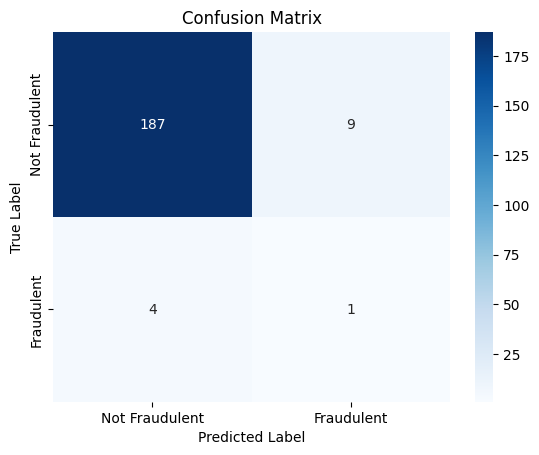

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.Figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Saving

In [46]:
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']